# Sentiment Analysis for TripAdvisor Reviews



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/theleadio/datascience_demo/master/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


## Exploring the Data

### Countplot

<AxesSubplot:xlabel='Rating', ylabel='count'>

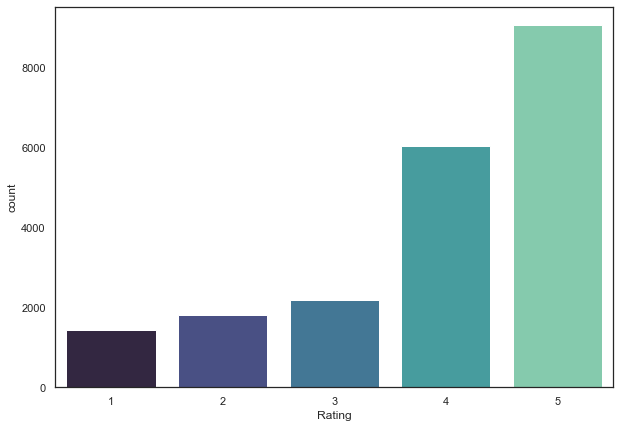

In [12]:
sns.set(style='white')
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='Rating', palette='mako')

Most of the comments have high ratings (4-5)

### Word Cloud

In [13]:
def wordcloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=15)
    plt.show() 

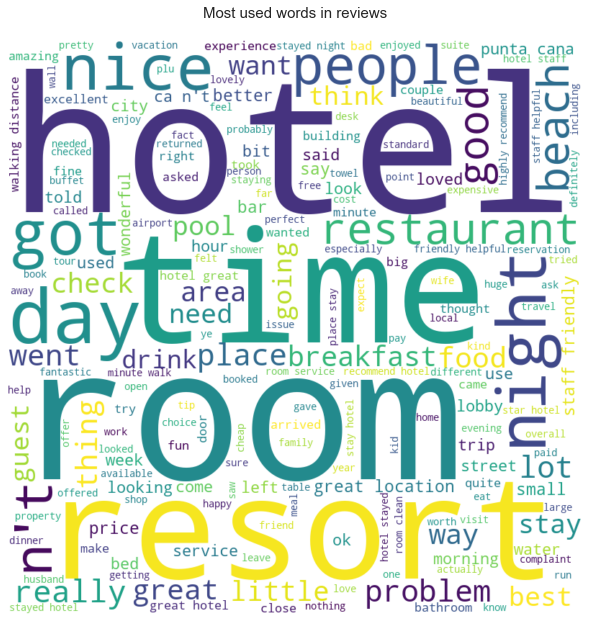

In [14]:
wordcloud_generator(df['Review'], title = 'Most used words in reviews\n')

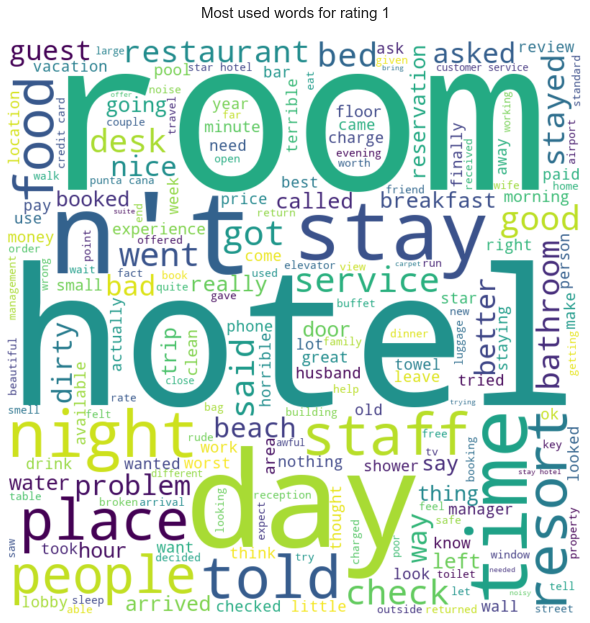

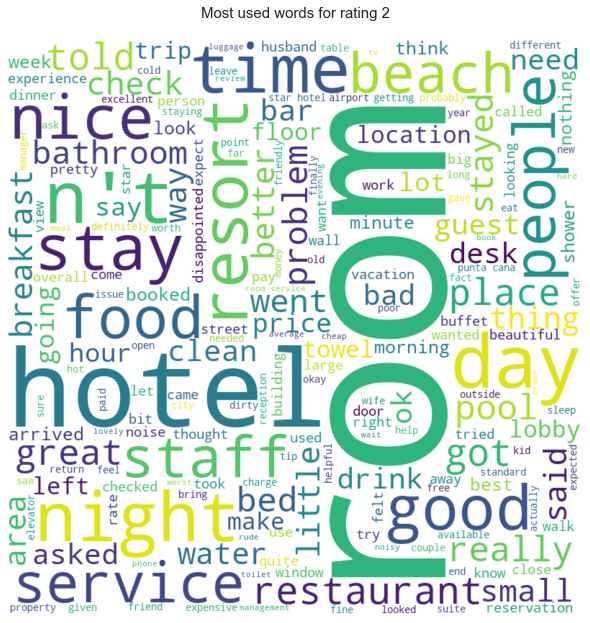

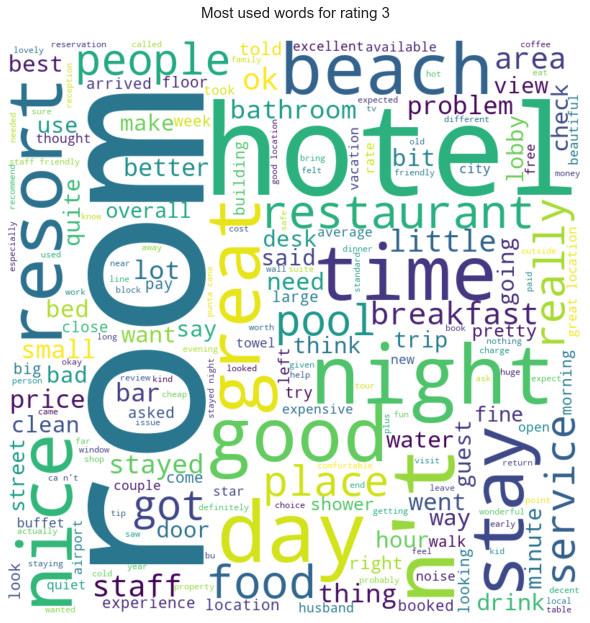

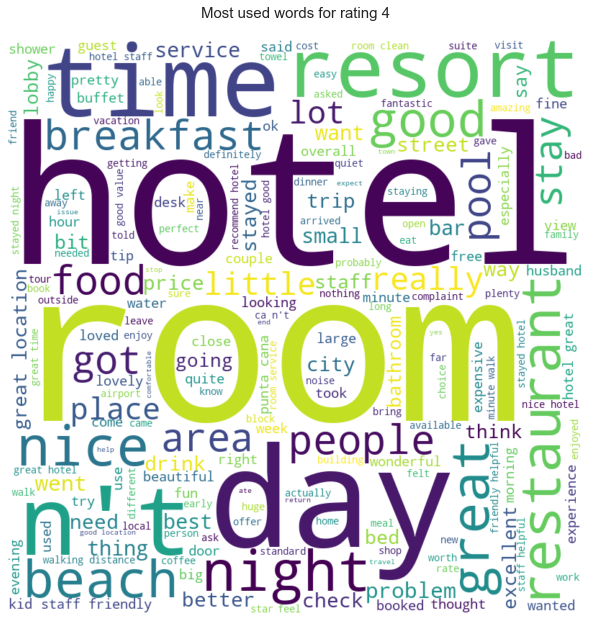

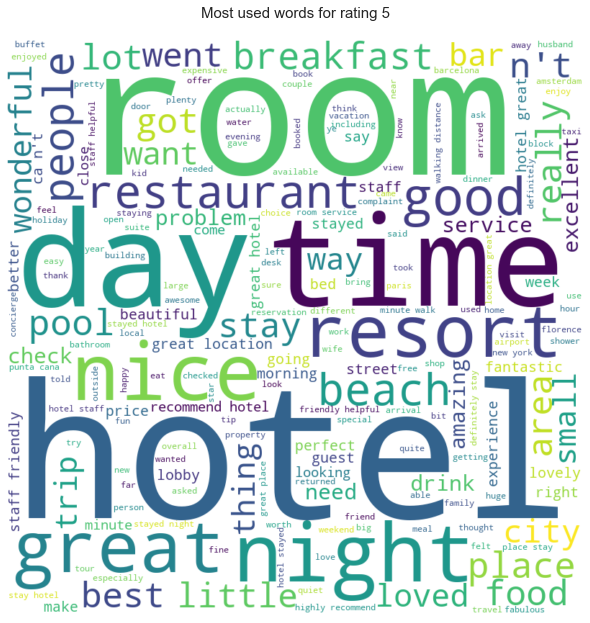

In [15]:
for rating in range(1, 6):
  reviews = df[df['Rating'] == rating]
  wordcloud_generator(reviews['Review'], title='Most used words for rating ' + str(rating) + '\n')
  print('\n')

Seems like the most common words is 'hotel room' and it exists in all ratings so there could be mixed reviews of the rooms.

## Analyse Sentiments using NLTK

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['Review']]

df['Sentiments'] = sentiments
df.head()

,Review,Rating,Sentiments
0,nice hotel expensive parking got good deal sta...,4,0.9747
1,ok nothing special charge diamond member hilto...,2,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,0.9912
4,"great stay great stay, went seahawk game aweso...",5,0.9797


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(neg_df['Review'])

### Keyword one : gym

In [25]:
query = 'gym'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.14107, 
Review: best hotel seattle, time stayed kimpton hotel definitely wo n't, stayed 10 different hotels seattle years best experience staff excellent starting pleasant young lady took booking continuing stay, request asking large room possible price point 3 adults sharing room request granted, fact joked room roomier used homes, mentioned seattle celebrate friend milestone birthday pleased complmentary bottle wine chocolates, nice note hotel room, attended courtesy wine get-together pleasant friendly event, fact just prior event run friend staying hotel asked desk join answer course understand hotel just undergone extensive renovation lovely lobby room nicely appointed, lot impressive art displayed, alexis feels upscale warm time felt welcomed, impressed stayed night wished longer, hardly wait back.kudo alexis hotel,  
-----
Similarity score: 0.18364, 
Review: just fine make minute trip seattle conventions going closest hotel downtown area, arrive dingy 70 exter

### Keyword two : breakfast

In [26]:
query = 'breakfast'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.25831, 
Review: tough beat casablanca wife stayed casablanca thursday 19th-sunday 22nd, hotel quiet place stay amid chaos times square, staff practice high level service hard hotels, greet entering hotel wish good day leave, request met cheerfully promptly, rooms not huge clean nice, rick cafe second floor guests breakfast morning coffee tea wine cheese snacks evening complimentary, access internet complimentary guests, hotel unique moroccan-themed decor pleasant change predictable chain hotel atmosphere, good restaurants immediate area including great italian restaurant right door hotel, overall casablanca exceptional place stay new york, stay return new york,  
-----
Similarity score: 0.26691, 
Review: small, husband particularly fond funky/modern boutique hotels size room left bit disappointed, rooms clean decorated cool little space, n't expecting 900 square foot suite small hardly carpet walk, bathroom hands smallest seen lives, maybe advantage able shower sit 

### Keyword three : customer service

In [27]:
query = 'customer service'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.23410, 
Review: loved place d'armes hotel just got staying days place d'armes hotel wonderful, hotel just like not better katrina, new orleans year stay hotel availability, rooms alway nice clean courtyards beautiful, continental breakfast delicious, stay again.the basingers georgia,  
-----
Similarity score: 0.30743, 
Review: kind considerate booked hotel reading reviews like best deal compared rates downtown hotels, reviews stated staff helpful friendly, case special way, attend mariners game saturday night running late coming eugene, unable stop hotel game, came game rental window broken owned stolen, called jeff hotel tell late sure hold room, finally arrived 2 police came scene, jeff helped basic necessities lookout police finally arrived 3. rest staff helpful remaining days stay thank jeff support evening, room nice clean, university inn good deal recommend friends, watch park seattle, night returned rental gentlemen lincoln suffered fate,  
-----
Similarity s

### Keyword four : wi-fi

In [28]:
query = 'wi-fi'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.10152, 
Review: loved kahala stayed kahala june 25 july 2 2007 wonderful time, family 4 6 4 year old boys annual sun vacation decompress, spent 6 solid days beach/pool kahala came home completely stress-free, beach absolutely gorgeous pool not huge perfect, service great breakfast plumeria awesome, took shuttle waikiki evening n't wait calm serenity kahala, loved twice daily maid service kept sand tended track minimum, perfect vacation kahala highly recommended,  
-----
Similarity score: 0.14483, 
Review: great older hotel downtown location great especially qwest field seahawks game, staff friendly helpful, room small clean appointed, recommend quick overnights,  
-----
Similarity score: 0.19329, 
Review: loved casablanca hotel, niece stayed past weekend truly wonderful place, entire staff friendly helpful, peter arranged car service airport dan followed request champagne arrival, day shopping wanted nice foot massage suggested place personally scheduled appointment

### Keyword five : swimming pool

In [29]:
query = 'swimming pool'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.22716, 
Review: comfort 4 night stay hotel rex exceeded expectations, lowdown location perfect, rex close theater district union square remote n't feel like tourist, access cable cars buses great, major downtown sights easy walk, bart trains not far n't mind walking 4 blocks n't ton luggage recommend using bart rex airport.atmosphere polished serene european feel minus attitude, small immaculate room second floor completely silent absolutely no view really did n't care becase decor lovely fun, nice size bathroom, lucked window air conditioner not sure rooms this.service desk staff attentive hardworking, cafe andree great food surprisingly low prices, room service inexpensive, business center convenient no charge room promptly cleaned day.price 175 night booked rex website received voucher breakfast morning tickets asian art museum, worth no regrets.lastly not mistaken chain owns rex maintains headquarters directly street hotel, serves incentive hotel running smoothl

### Keyword six: room

In [30]:
query = 'room'
query_tfidf = tfidf.transform([query])

cosims = cosine_similarity(query_tfidf, feature).flatten()
results = reversed(cosims.argsort()[:-6:-1])

for r in results:
  print(f"Similarity score: {cosims[r]:.5f}, \nReview: {df.iloc[r]['Review']}")
  print('-----')

Similarity score: 0.24804, 
Review: recommend hotel stayed university inn june 3 4. directions airport great no problem finding inn, parking bit cramped did n't use car did n't matter.the staff friendly helpful, room clean comfortable quiet appreciated.we went sightseeing finished called inn sent shuttle pick great accomodation, stay visiting seattle n't ask nicer cleaner moderately priced hotel university inn, thanks staff,  
-----
Similarity score: 0.25321, 
Review: pretty nice experience honest reading reviews little worried staying, booked group family function, thought overall good experience, really liked health club good machines weights, room attractive bed bit hard tastes, service generally excellent, day room not late afternoon know happen, prices gift shop convenient shopping loved galleria n't bad problem,  
-----
Similarity score: 0.27568, 
Review: stay hotel ny stayed couple nights hotel, right heart times square, previous review said rooms small immaculately clean servic

### Analyzing Sentiment Intensity

In [31]:
analyzer = SentimentIntensityAnalyzer()

In [32]:
sentiments = [analyzer.polarity_scores(review)['compound'] for review in df['Review']]

In [33]:
# create a new column in 'df' with sentiment intensity scores

df['Sentiments'] = sentiments

In [34]:
df.head()

,Review,Rating,Sentiments
0,nice hotel expensive parking got good deal sta...,4,0.9747
1,ok nothing special charge diamond member hilto...,2,0.9787
2,nice rooms not 4* experience hotel monaco seat...,3,0.9889
3,"unique, great stay, wonderful time hotel monac...",5,0.9912
4,"great stay great stay, went seahawk game aweso...",5,0.9797


In [36]:
# Reviews with more high ratings but it got negative sentiments

pd.set_option('display.max_colwidth', None)
df[(df['Rating'] == 5) & (df['Sentiments'] < 0)].sort_values('Sentiments')[0:20]

,Review,Rating,Sentiments
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252
12767,"dumbstruck nothing kudos place check check room staff nothing short excellent, view room overlooking trade center river incredible, weekend kind quiet want, skip restaurant recommendations church day rate..you wo n't dissapointed, traveller spends 80 nights year hotels, place star rating, not solid, loved having starbucksa door complaint lack coffee maker room, thats complaint,",5,-0.9060
3199,"disgusted comments just wanted make comments, notice bad reviews come cities north-east usa, makes sick listen prejudice comments, n't realize iknow n't foreigner going country need learn language, dont criticise country does n't know speak english, wake people different attitude explore different cultures, ca n't stay home visit english speaking country,",5,-0.9021
1317,"oasis preface saying really hate waikiki, crowds, noise, over-commercialization, asked fly speak conference excited visit islands mean c'mon kind dreading waikiki, wow, royal hawaiian saved, older historic section, read reviews people did n't like, granted legitimately bad experience, think likely accustomed box-like rooms standard here.my room quiet, outside garden birds singing, staff not professional courteous, 10. surrounded highrises insanity tourism gone wild place fortress solitude, come, heartbeat, bring family,",5,-0.8292
2025,"katrina life saver did not stay holiday inn hurricane

### Negative Sentiments

In [37]:
neg_df = df[df['Sentiments'] <= -0.05].sort_values("Sentiments")
neg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,1569.0,1.738050,0.972629,1.0000,1.0000,1.0000,2.0000,5.0000
Sentiments,1569.0,-0.674307,0.271835,-0.9974,-0.9102,-0.7506,-0.4927,-0.0511


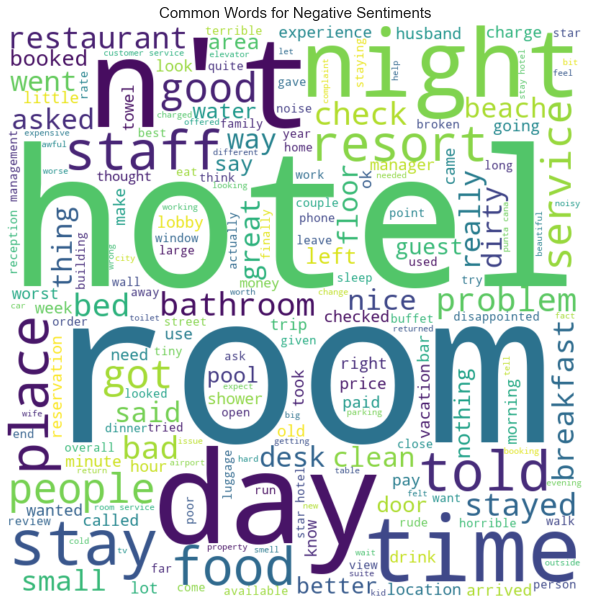

In [38]:
wordcloud_generator(neg_df['Review'], title="Common Words for Negative Sentiments")

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(neg_df['Review'])

In [40]:
query = "staff"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(neg_df.iloc[r]['Review'])

-----
hated inn terrible, room-service horrible staff un-welcoming, decor recently updated lacks complete look, managment staff horrible,  
-----
terrible desk staff ana management bought 3 tickets wife daughter vip features, 2 desk people handling time coming going passengers, wrong type room 3 1/2 hours lining check coming going inspect rooms pay extra room reserved place, no superivisor sight willing help, staff rude uncaring accepting 20 dollars bribes solve problems luck like no drinking water no a/c smelly rooms no working toilets broken tv etc.there no staff help luggage, experienced hotel like, stay away hotel.the food restaurant staff good drinks terrible,  
-----
subpar hotel rude staff damaged car stayed hotel gioconda days, time staff rude unhelpful room not par amenities promised not delivered, asked directions locations florence given factually incorrect information hotel staff, no in-room safe hotel turn keys desk left morning, adding concern came early staff inexplicabl

In [41]:
# rating scale equals to 5 but negative sentiments
pd.set_option('display.max_colwidth', None)
neg_df[neg_df['Rating'] == 5].sort_values("Sentiments")[0:5]

,Review,Rating,Sentiments
3613,"fabulous, booking vacation 4 dismay realized punta cana not mexico, frantically searched information possibly iberostar punta cana, tripadvisor helpful reading personal reviews experiences nervous wreck, apprehension arrived 12/5/03, arrival airport flights arriving time orderly fashion went quickly, check went wanted king sized beds none available till day, no problem, grounds absolutely beautifull maintained, entire resort practically spotless, people work hard cleaning areas resort, met unfriendly worker, bent backward accomodate reason course, food aplenty satisfy tastebuds, types activity spanish lessons dancing arobics, did nothing relax eat drink dance alittle night, no group got sick brushed teeth spigot water, believe moderation probably key, rooms clean no trouble whatsoever housekeeping, wonder people wrote negative remarks place stayed sameplace did, thing upset trip did not book weeks, heart beat,",5,-0.9677
7143,"wonderful 10 year anniversay went secrets feb. 28- mar, 6 2004. read million reviews quite nervous going having bad experience, not happened, beautiful experience, resort beautiful people friendly accommidating, thing wrong, negative review true slowness service restaurants, did bring bug spray use not night walked beach, complaint resort little pet peeve n't cappucino 10:00, like alot earlier really no big deal, resort heart beat try new place, worrying good place, absolutely, email question,",5,-0.9272
13296,"hell argonaut changed planned birthday getaway city husband, stuck work til late night, packed grabbed sleepy kids drove argonaut, husband not eaten breakfast things not going, cranky kids irrate husband prayed hotel nice, tripadvisor took chance, soon dinner 10pm stood line 2 couples germans needed explained, thought worst going, time turn receptionist bit annoyed ordeal, requested room gave key, turned mentioned husband birthday bad start, suggested room 2 queens not satisfactory best comfortable, went room definitely quiet inner court nothing write home, went downstairs asked choices, suggested ocean view king size bed separate pull sofa children, jacuzzi tub, offered room deep discount took, receptionist n't warm fuzzy type person encountered gets a+ trying knowing condition.it luxurious comforter 2 bedroom suite-pocket doors table minibar huge space thousand square feet overlooking alcatraz ocean leopard robes huge jacuzzi tub family fit, 2 kids, husband able sleep luxurious bath, kids plenty running room.i sad leave know time, request upgrade king suite night, btw park beach parking garage, cheaper,",5,-0.9252
12767,"dumbstruck nothing kudos place check check room staff nothing short excellent, view room overlooking trade center river incredible, weekend kind quiet want, skip restaurant recommendations church day rate..you wo n't dissapointed, traveller spends 80 nights year hotels, place star rating, not solid, loved having starbucksa door complaint lack coffee maker room, thats complaint,",5,-0.9060
3199,"disgusted comments just wanted make comments, notice bad reviews come cities north-east usa, makes sick listen prejudice comments, n't realize iknow n't foreigner going country need learn language, dont criticise country does n't know speak english, wake people different attitude explore different cultures, ca n't stay home visit english speaking country,",5,-0.9021


### Positive Sentiments

In [42]:
pos_df = df[df['Sentiments'] >= 0.05].sort_values("Sentiments")
pos_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,18831.0,4.144549,1.053647,1.00,4.0000,4.0000,5.0000,5.0000
Sentiments,18831.0,0.930463,0.136119,0.05,0.9436,0.9774,0.9897,0.9999


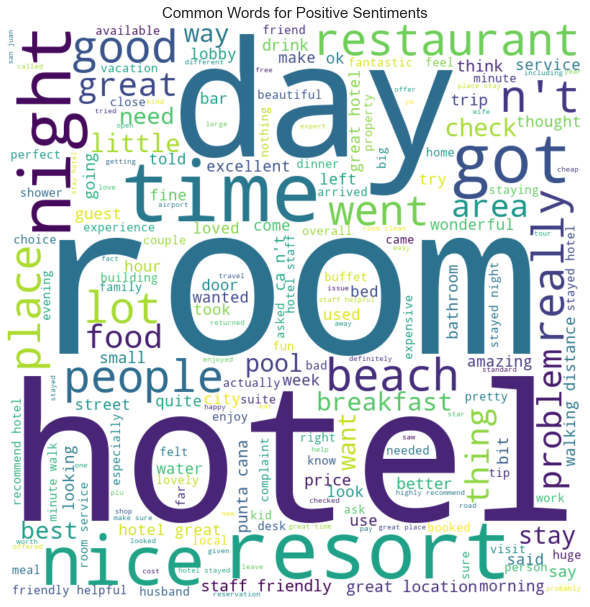

In [43]:
wordcloud_generator(pos_df['Review'], title="Common Words for Positive Sentiments")

In [44]:
feature = tfidf.fit_transform(pos_df['Review'])

In [45]:
query = "great"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(pos_df.iloc[r]['Review'])

-----
great place say not said, great hotel great staff excellent location,  
-----
hotel great hotel great money clean good resturant great staff worth location great,  
-----
great hotel great location great service stayed hotel 3 nights, rooms nice clean, service great, best location, definitely stay amsterdam,  
-----
100 happy, sad leave, great views harbour/city great service great hotel great room great food great bar great facilities great location clean comfortable modern staff helpful, felt like 5 star hotel 5 star price, hk assuming prices similar definately stay time.very happy,  
-----
regular, amazing value, stay hotel let, great beds great balconies great breakfast great staff great location great value, fantastic pool, amazing value money,  


In [46]:
# rating scale equals to 1 but positive sentiments
pd.set_option('display.max_colwidth', None)
pos_df[pos_df['Rating'] == 1].sort_values("Sentiments")[0:5]

,Review,Rating,Sentiments
7480,"hated cocktails hello concierge, promised complimentary cocktails watered not southern standards georgia standards, oh n't think trying sneak extra people room remember happened paul mccartney,",1,0.0516
7196,"avoid save money overpriced hotels stayed does n't include breakfast, walls paper actually hear people urinating room, disgusting, morning maids woke shouting hall, standard cleanliness non existent, entire stay used plasters stuck shelf mirrors half cardboard anti slip mat stuck bath, positive bed fairly comfortable pointless noisy-even ear plugs, basically paying location young n't mind using public transport advise staying minutes paying half money,",1,0.0516
12512,"disappointed returned month trip resort disappointed stay, beaches dominican republic beautiful beaches property paradise bavarro, accomodations matter, room linens smelled mildew, beds linens old stained, refrigerator stocked beverages difficult simple things room, long process obtain ironing board iron, brought room limited hour use, food hotel terrible, not picky eater generally like eat place travel, place exception, food overcooked oily salty, meats fatty tough, sausages cold cuts tasted like came, food did eat sick days, n't available drink outside frozen mixed drinks, did n't normal mixers alcohol, did n't cranberry juice grapefruit juice available, rained days stay not property inclimate weather, activities staff inexperienced unimaginative, entertainment consisted karoke performances, excursions outside hotel 75 majority involved water sports, better time jamaica mexico,",1,0.0516
600,"not return park plaza extremely unhappy stay park plaza, level service embarassing waited 30 minutes hold concierge twice one-night stay evening morning took 20 minutes check hotel bar staff disgruntled far accomodating, return park plaza encourage explore hotels boston far exceed park plaza quality level service,",1,0.0534
19265,"disappointing booked hotel based reviews read disappointed, booked superior rooms paying price, couple given room just big house double bed, single travelling companion given single room feet square floor space shower flooded room used.we complained immediately reception staff unhelpful saying hotel fully booked no duty manager able speak, day did manager changed rooms descent sized doubles filthy, bath hair nail clippings carpet, rooms did not bedding did arrive handed duvet covers separately left making ourselves.on plus hotel located nice area amsterdam park hotel lovely walk centre.the hotel close needed refurbishment november got distinct feeling staff lost doing jobs properly, certainly not return,",1,0.0571


### Re-check Keyword Queries

In [47]:
feature = tfidf.fit_transform(df['Review'])

In [48]:
q1 = "overpriced"
q2 = "terrible"
q3 = "best breakfast"
q4 = "atmosphere"
q5 = "problem"

queries = [q1, q2, q3, q4, q5]

for i in queries: 
    query_feature = tfidf.transform([i])

    if i == q1: 
        print("\n\nKeywords 1:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q2: 
        print("\n\nKeywords 2:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q3: 
        print("\n\nKeywords 3:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q4: 
        print("\n\nKeywords 4:",'\033[1m' + i + '\033[0m')
        print(query_feature)
    elif i == q5: 
        print("\n\nKeywords 5:",'\033[1m' + i + '\033[0m')
        print(query_feature)

    cosims = cosine_similarity(query_feature, feature).flatten()
    results = reversed(cosims.argsort()[-6:-1])
    # print(results)

    for r in results: 
        print('-----')
        print(f"similarity score: {cosims[r]:.4f}, \nreview: {df.iloc[r]['Review']}")



Keywords 1: overpriced
  (0, 33804)	1.0
-----
similarity score: 0.6219, 
review: overpriced overpriced hotel rooms small breakfast v average, good location, unfortunately arrived hotel booked, moved hotel night right pain,  
-----
similarity score: 0.4862, 
review: good overpriced stayed 3 days, good overpriced hotel, good breakfast breakfast room, service staff not friendly, rooms small, good disappointing, lot noise, rooms wc renewed not, good location,  
-----
similarity score: 0.4363, 
review: overpriced got friends family discount room way overpriced, location great walking various places city room tiny, no idea hilton insists making people pay internet access especially room expensive, not particularly impressive,  
-----
similarity score: 0.4035, 
review: overpriced unbearably rude staff grounds amenities resort absolutely stunning incredibly overpriced, boyfriend went off-season got great deal room ocean view guests hotel, eating drinking hotel ridiculously expensive medicore